In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv("prc500.txt", delim_whitespace=True, header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,40.44,4.90,30.92,18.51,47.69,61.70,54.07,18.65,44.13,49.39,...,52.30,38.38,54.80,28.49,31.98,63.15,51.62,11.12,33.32,41.10
1,40.58,4.88,30.95,18.41,47.55,61.38,54.10,18.71,43.97,49.29,...,52.48,38.37,54.78,28.40,32.18,63.15,51.69,11.15,33.35,41.35
2,40.52,4.90,31.02,18.37,47.70,62.10,54.15,18.63,44.13,49.61,...,52.08,38.40,54.82,28.33,32.04,63.16,51.68,11.16,33.31,41.82
3,40.47,4.92,30.98,18.42,47.66,62.70,54.16,18.51,44.22,49.53,...,52.13,38.41,54.83,28.28,31.70,63.19,51.74,11.14,33.70,41.86
4,40.23,4.91,30.93,18.39,48.09,63.06,54.20,18.62,44.55,49.57,...,52.76,38.39,54.80,28.48,31.59,63.19,51.81,11.14,33.76,41.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,39.45,3.00,27.18,16.29,44.49,54.18,51.77,12.79,38.21,48.99,...,64.44,36.64,51.78,26.47,26.26,60.66,49.36,8.11,32.02,41.43
496,39.45,3.00,27.20,16.27,44.32,53.69,51.83,12.79,38.28,49.08,...,63.40,36.67,51.81,26.62,26.22,60.67,49.33,8.12,32.05,41.56
497,39.24,3.02,27.18,16.16,44.18,53.69,51.86,12.84,38.22,49.10,...,62.80,36.69,51.81,26.67,26.02,60.68,49.39,8.08,32.06,42.18
498,39.14,3.01,27.17,16.19,44.07,53.63,51.82,12.75,38.15,48.92,...,61.82,36.69,51.77,26.45,26.06,60.68,49.38,8.06,32.14,42.26


In [3]:
p = df.to_numpy()
p

array([[40.44,  4.9 , 30.92, ..., 11.12, 33.32, 41.1 ],
       [40.58,  4.88, 30.95, ..., 11.15, 33.35, 41.35],
       [40.52,  4.9 , 31.02, ..., 11.16, 33.31, 41.82],
       ...,
       [39.24,  3.02, 27.18, ...,  8.08, 32.06, 42.18],
       [39.14,  3.01, 27.17, ...,  8.06, 32.14, 42.26],
       [39.32,  3.03, 27.16, ...,  8.03, 32.36, 41.94]])

In [4]:
p_log = np.log(p)
p_log_diff = np.diff(p_log, axis=0)
p_log_diff

array([[ 0.00345594, -0.00408999,  0.00096978, ...,  0.00269421,
         0.00089996,  0.0060643 ],
       [-0.00147966,  0.00408999,  0.00225916, ...,  0.00089646,
        -0.00120012,  0.01130227],
       [-0.00123472,  0.00407333, -0.00129032, ..., -0.00179372,
         0.01164019,  0.00095602],
       ...,
       [-0.00533741,  0.00664454, -0.00073556, ..., -0.00493828,
         0.00031196,  0.01480801],
       [-0.00255167, -0.00331675, -0.00036799, ..., -0.00247832,
         0.00249221,  0.00189484],
       [ 0.00458833,  0.00662254, -0.00036812, ..., -0.00372903,
         0.00682173, -0.00760099]])

In [5]:
p_log_diff_corr = np.corrcoef(p_log_diff, rowvar=False)
p_log_diff_corr.shape

(100, 100)

<AxesSubplot:>

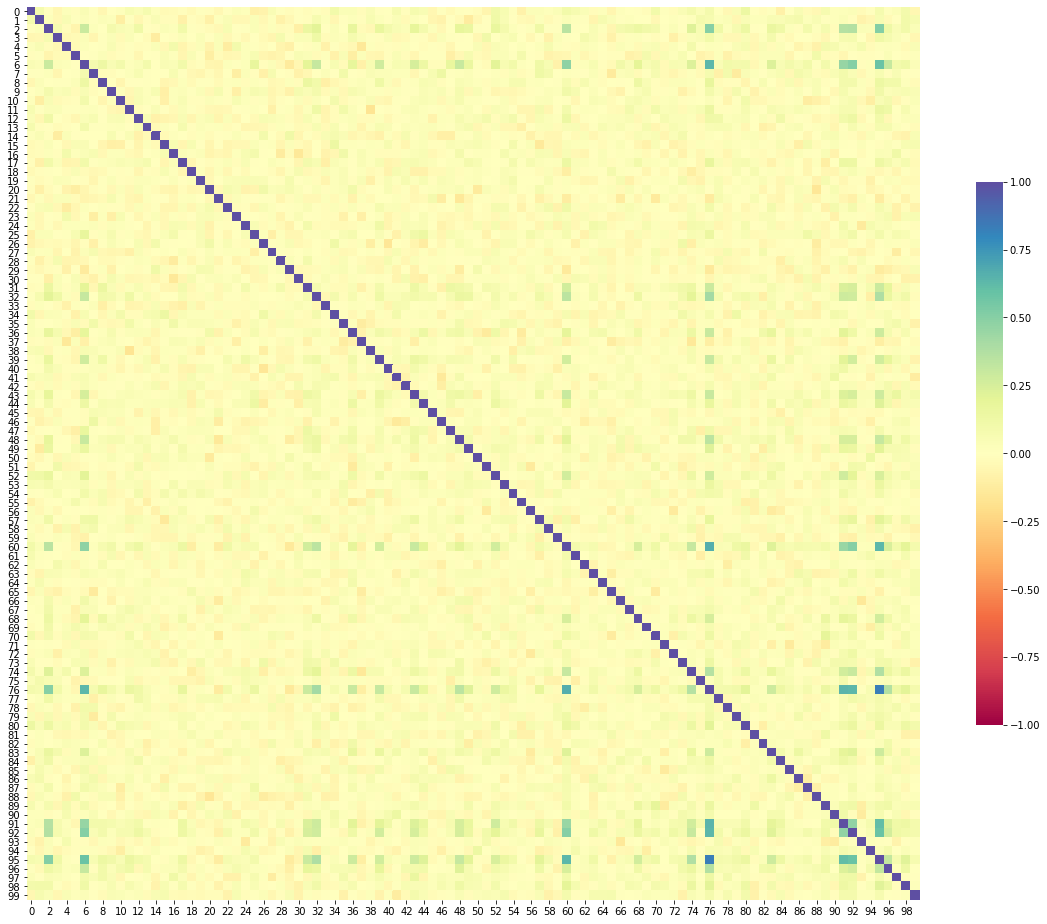

In [6]:
fig, ax = plt.subplots(figsize=(20, 20), facecolor='white')
sb.heatmap(p_log_diff_corr, ax=ax, cmap='Spectral', square=True, center=0, vmax=1.0, vmin=-1.0, cbar_kws={"shrink": .5})

In [8]:
def plot_cmp(*args):
    fig, axs = plt.subplots(len(args), 1, figsize=(20, 5 * len(args)))
    for i in range(len(args)):
        axs[i].plot(p.T[args[i]])
        axs[i].set_title(f"i={args[i]}")

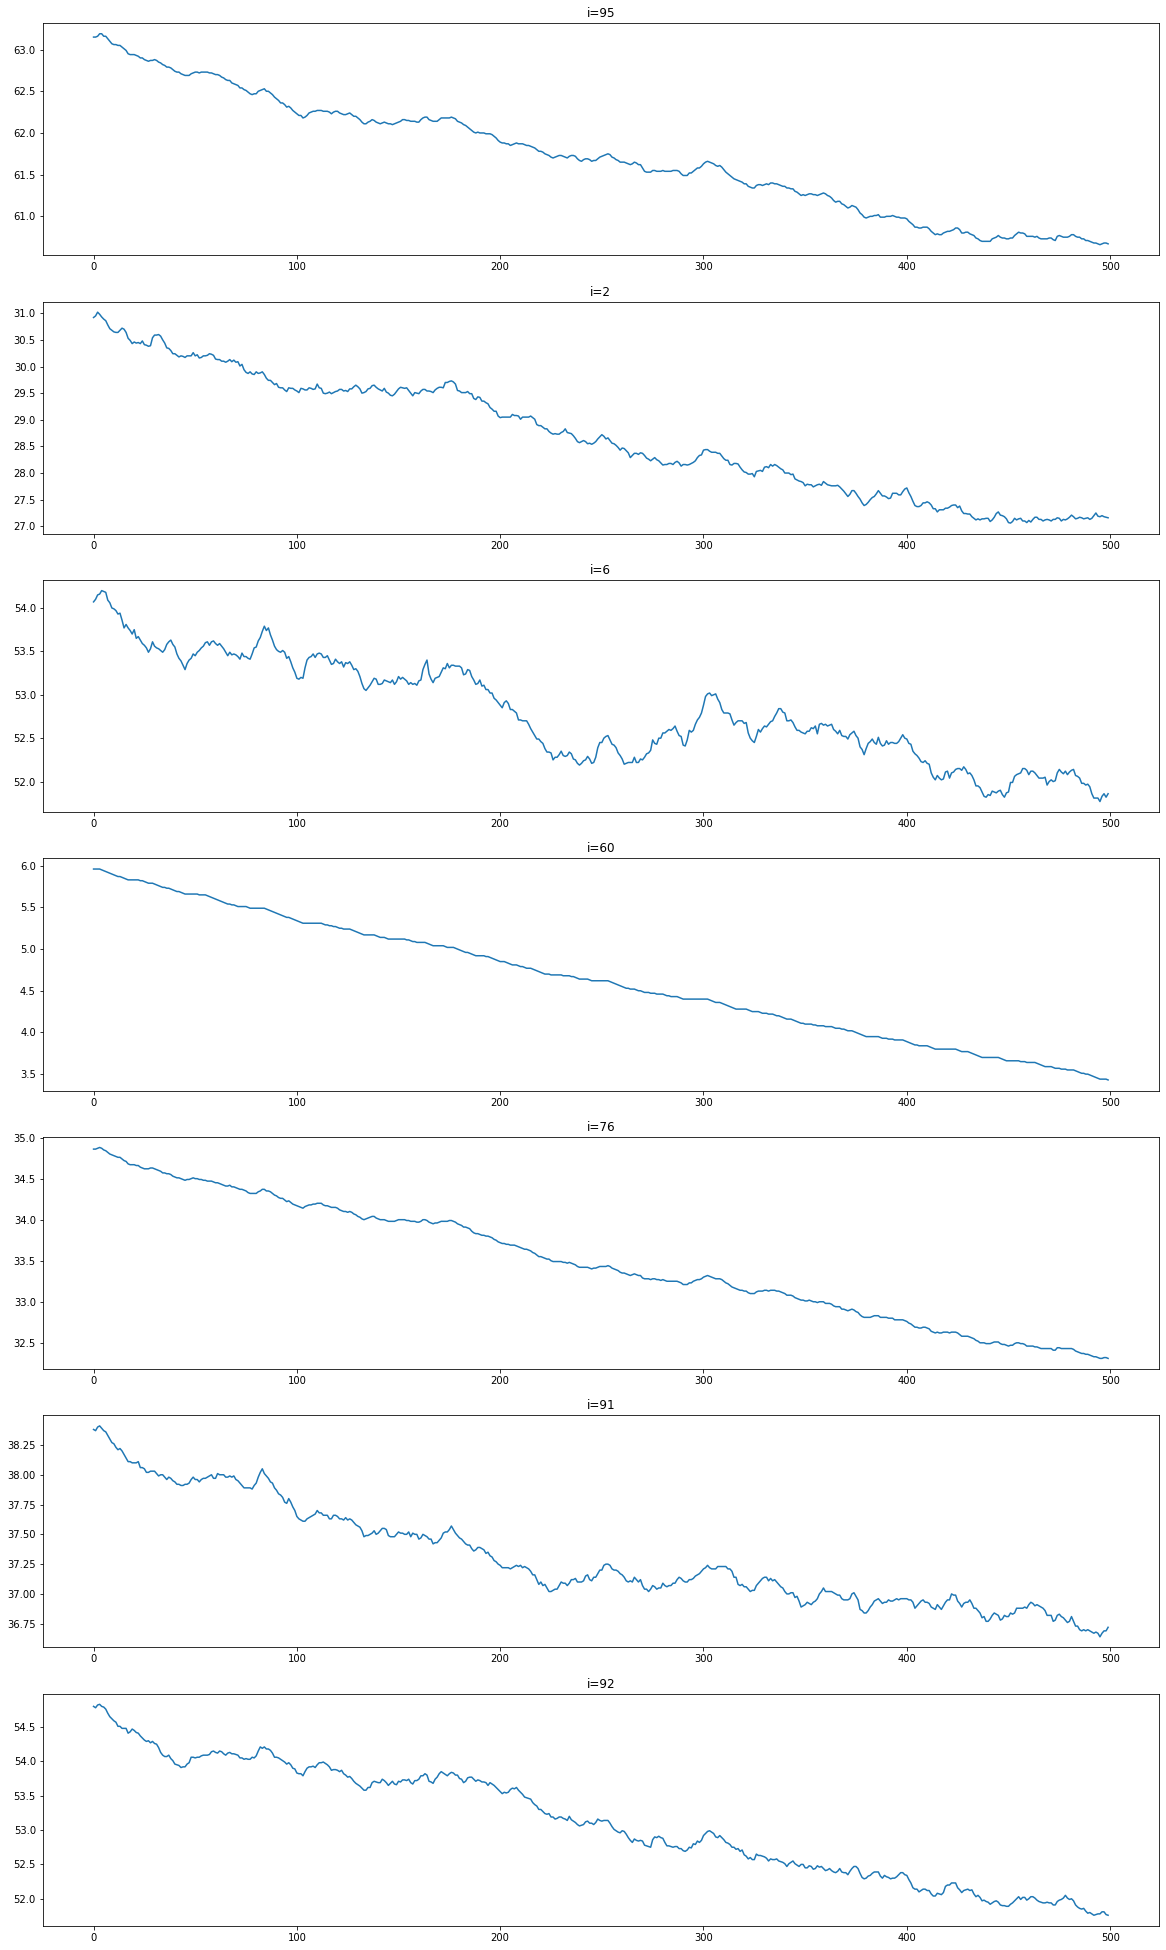

In [9]:
plot_cmp(95, 2, 6, 60, 76, 91, 92)